### What is data cleaning

- Data cleaning is a process of detecting, correcting or removing corrupt/ inaccurate/ irrelevent records from a dataset
table or database. 

- It also refers to identifying incomplete, incorrect, or irrelevent parts of the data and then replacing, modifying, or deleting useless data.



In [15]:
import pandas as pd

In [16]:
df=pd.read_csv("../data/titanic_data.csv")

In [17]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
df.sort_values('Fare')

PassengerId  Survived  Pclass                                Name  \
271          272         1       3        Tornquist, Mr. William Henry   
597          598         0       3                 Johnson, Mr. Alfred   
302          303         0       3     Johnson, Mr. William Cahoone Jr   
633          634         0       1       Parr, Mr. William Henry Marsh   
277          278         0       2         Parkes, Mr. Francis "Frank"   
..           ...       ...     ...                                 ...   
438          439         0       1                   Fortune, Mr. Mark   
341          342         1       1      Fortune, Miss. Alice Elizabeth   
737          738         1       1              Lesurer, Mr. Gustave J   
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
271    male  25.0      0      0      LINE    0.0000          NaN        S  
597    male  49.0      0      0      LINE    0.0000          NaN        S  
302    male  19.0      0      0      LINE    0.0000          NaN        S  
633    male   NaN      0      0    112052    0.0000          NaN        S  
277    male   NaN      0      0    239853    0.0000          NaN        S  
..      ...   ...    ...    ...       ...       ...          ...      ...  
438    male  64.0      1      4     19950  263.0000  C23 C25 C27        S  
341  female  24.0      3      2     19950  263.0000  C23 C25 C27        S  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  

[891 rows x 12 columns]

In [19]:
df.sort_values('Fare',ascending=False,inplace=True)

In [24]:
df.reset_index(drop=True,inplace=True)

In [25]:
df.head()

PassengerId  Survived  Pclass                                Name     Sex  \
0          259         1       1                    Ward, Miss. Anna  female   
1          738         1       1              Lesurer, Mr. Gustave J    male   
2          680         1       1  Cardeza, Mr. Thomas Drake Martinez    male   
3           89         1       1          Fortune, Miss. Mabel Helen  female   
4           28         0       1      Fortune, Mr. Charles Alexander    male   

    Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
0  35.0      0      0  PC 17755  512.3292          NaN        C  
1  35.0      0      0  PC 17755  512.3292         B101        C  
2  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
3  23.0      3      2     19950  263.0000  C23 C25 C27        S  
4  19.0      3      2     19950  263.0000  C23 C25 C27        S

### Missing Data

In [28]:
df.shape

(891, 12)

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### As cabin's almost data is null, so we can remove it!!!

In [31]:
df.drop("Cabin",axis=1,inplace=True)

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [36]:
df.Age.agg(["mean","median"])

mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [39]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
df.fillna({"Age":df.Age.mean(), "Embarked":"S"},inplace=True)

In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Find Relationship betweek two columns

In [57]:
df[df.Survived==0]["Pclass"].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

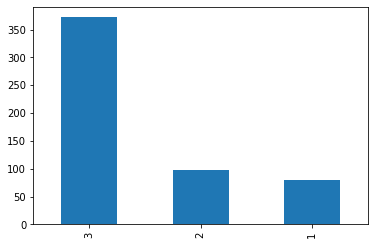

In [56]:
df[df.Survived==0].Pclass.value_counts().plot(kind="bar")